In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("D:/Northeastern_Data/Summer_19/CS_7290/project_data/ohe_movies.csv", index_col = 0)

In [4]:
data.head()

,title_x,revenue,Larry Mullen Jr.,50 Cent,A. J. Benza,A. J. Langer,A. Jay Radcliff,A. Michael Baldwin,A. Russell Andrews,A.D. Miles,...,Zuzana Geislerová,Ángel Salazar,Édgar Vivar,Ólafur Darri Ólafsson,Óscar Casas,Óscar Jaenada,Ørjan Gamst,Đỗ Thị Hải Yến,Юлия Снигирь,徐帆
0,Avatar,2787965087,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,961000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,880674609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,1084939099,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,John Carter,284139100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([2.998e+03, 2.550e+02, 7.500e+01, 3.400e+01, 6.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.04199845,  0.05800155,  0.15800155,  0.25800155,  0.35800155,
         0.45800155,  0.55800155,  0.65800155,  0.75800155,  0.85800155,
         0.95800155]),
 <a list of 10 Patch objects>)

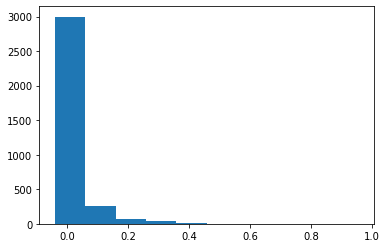

In [5]:
plt.hist(((data['revenue'] - data['revenue'].mean()) / (data['revenue'].max() - data['revenue'].min())))

(array([  15.,    6.,    2.,    9.,   40.,  117.,  303., 1159., 1489.,
         234.]),
 array([ 1.60943791,  3.6233519 ,  5.63726589,  7.65117988,  9.66509387,
        11.67900786, 13.69292185, 15.70683584, 17.72074983, 19.73466382,
        21.74857781]),
 <a list of 10 Patch objects>)

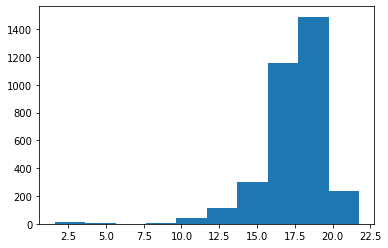

In [6]:
plt.hist(np.log(data['revenue'].values))

In [7]:
Y = data['revenue'].to_numpy()
X = data.iloc[:, 1:]
X_NoCF = X.iloc[:, :-2]

In [9]:
Y

,title_x
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
5,Spider-Man 3
6,Tangled
7,Avengers: Age of Ultron
8,Harry Potter and the Half-Blood Prince
9,Batman v Superman: Dawn of Justice


In [8]:
Y_Scaled = StandardScaler().fit_transform(Y)
Y_Log = np.log(Y)

ValueError: could not convert string to float: 'Avatar'

In [39]:
def fitModel(X, Y, test_size=0.8, model=LinearRegression(), cat=False):
#     model = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    if not cat: 
        score = r2_score(Y_test, Y_pred)
    else:
        score = model.score(X_test, Y_test)
    plt.plot(Y_pred, Y_test, 'o')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Score : ' + str(score))
    plt.show()
    #return model.coef_
    return Y_pred, Y_test

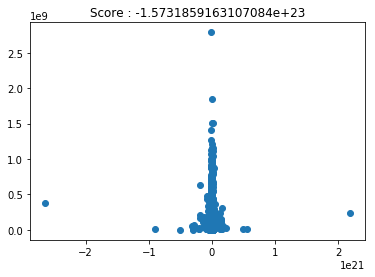

In [53]:
coef_NoCF_Y = fitModel(X_NoCF, Y)

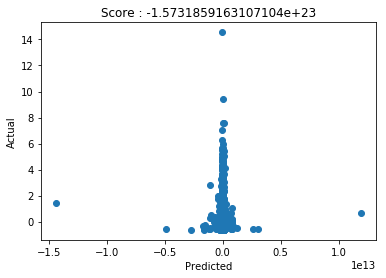

array([[-1.28335560e+11, -9.95916365e+10,  1.61505570e+10, ...,
         0.00000000e+00,  6.53723131e+09,  0.00000000e+00]])

In [15]:
coef_NoCF_Y_Scaled = fitModel(X_NoCF, Y_Scaled)
coef_NoCF_Y_Scaled

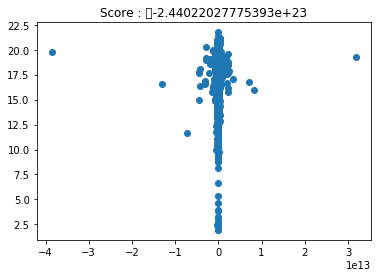

In [47]:
coef_NoCF_Y_Log = fitModel(X_NoCF, Y_Log)

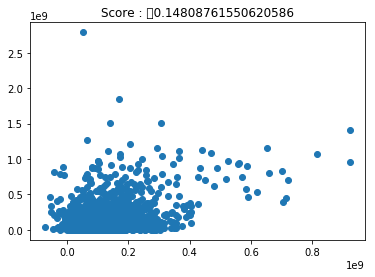

In [49]:
coef_Y = fitModel(X, Y)

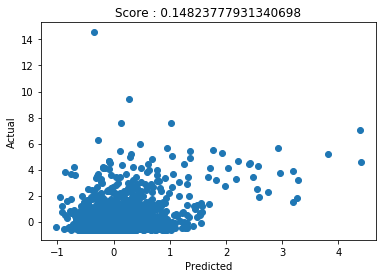

array([[ 0.0488221 , -0.13607754,  0.02645704, ...,  0.        ,
         0.07569389, -0.03306008]])

In [16]:
coef_Y_Scaled = fitModel(X, Y_Scaled)
coef_Y_Scaled

In [20]:
coef_Y_Scaled[:5], coef_NoCF_Y_Scaled[:5]

(array([[ 0.0488221 , -0.13607754,  0.02645704, ...,  0.        ,
          0.07569389, -0.03306008]]),
 array([[-1.28335560e+11, -9.95916365e+10,  1.61505570e+10, ...,
          0.00000000e+00,  6.53723131e+09,  0.00000000e+00]]))

In [27]:
np.abs(coef_NoCF_Y_Scaled[0][:5] - coef_Y_Scaled[0][:5] )

array([1.28335560e+11, 9.95916365e+10, 1.61505570e+10, 7.21734052e+10,
       4.84229076e+10])

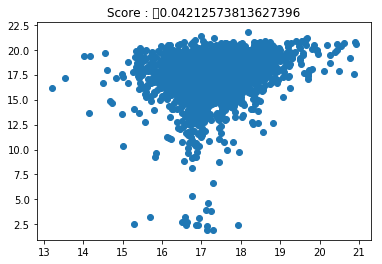

In [51]:
coef_Y_Log = fitModel(X, Y_Log)

In [63]:
from  sklearn.ensemble import RandomForestRegressor

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


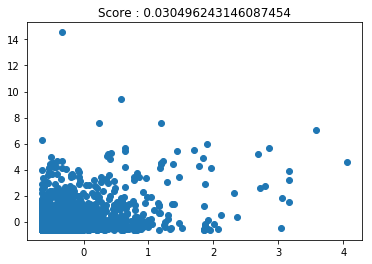

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [64]:
coef_NoCF_Y_Scaled = fitModel(X_NoCF, Y_Scaled, model=RandomForestRegressor())

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


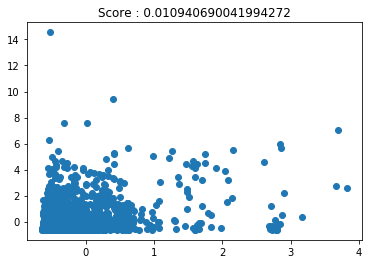

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [65]:
coef_Y_Scaled = fitModel(X, Y_Scaled, model=RandomForestRegressor())

In [28]:
Y_Cat = np.where(Y.values > 100000000, 1, 0)

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


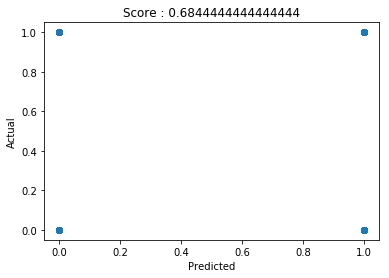

In [40]:
pred1, y1 = fitModel(X, Y_Cat, model=LogisticRegression(), cat=True)

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


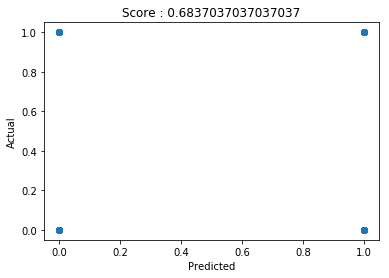

In [41]:
pred2, y2 = fitModel(X_NoCF, Y_Cat, model=LogisticRegression(), cat=True)

In [37]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y1, pred1)

array([[1733,   56],
       [ 796,  115]])

In [43]:
confusion_matrix(y2, pred2)

array([[1737,   52],
       [ 802,  109]])

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])